![https://i.ytimg.com/vi/O45AaRPQhuI/hqdefault.jpg](https://i.ytimg.com/vi/O45AaRPQhuI/hqdefault.jpg)

[Why Neural Networks Can Learn Any Function | The Universal Approximation Theorem](https://youtu.be/O45AaRPQhuI)

## Kavramlar

- Aktivasyon Fonksiyonu
- Overfitting (Aşırı Öğrenme[Öğrenilen])
- Transfer Learning (Aktarım Öğrenimi)
- Fine Tuning (İnce Ayar)
- Test / Train / Validation Split

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
df = pd.DataFrame({
    'borc': [1, 2, 4, 6],
    'risk': [1, 2.2, 5, 7.5],
})
df

,borc,risk
0,1,1.0
1,2,2.2
2,4,5.0
3,6,7.5


In [22]:
# Borç 15 olunca risk ne olur?

agirlik1 = 0.05
agirlik2 = 0.5

bias = 0.2

def risk_hesapla(borc):
    risk = round(agirlik1 * borc + agirlik2 * borc ** 2 + bias, 3) # f(x) = 0.5x + 0.7x^2 + 0.1 f(x) = ax + bx^2 + c
    if risk < 0:
        return 0
    return risk

borc_15 = risk_hesapla(2)
borc_15

2.3

In [17]:
ilk_tahminler = []
for borc in df['borc']:
    risk_tahmini = risk_hesapla(borc)
    ilk_tahminler.append(risk_tahmini)
ilk_tahminler

[0.75, 2.3, 8.4, 18.5]

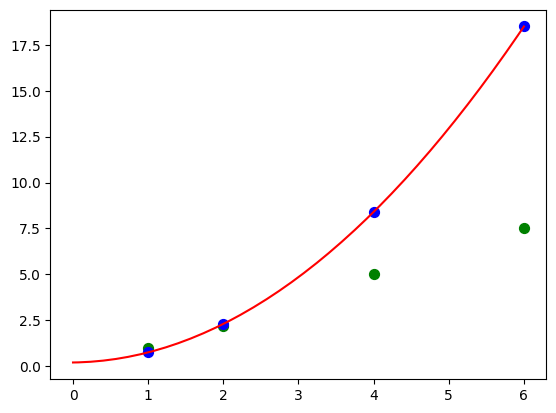

In [23]:
def grafigi_ciz(tahminler = ilk_tahminler):
    line = [risk_hesapla(i) for i in np.linspace(0, 6, 1000)]
    plt.plot(np.linspace(0, 6, 1000), line, c = 'red')
    plt.scatter(df['borc'], df['risk'], s = 50, c = 'green', label = "Doğru Değerler")
    plt.scatter(df['borc'], tahminler, s = 50, c = 'blue', label = "İlk Tahminler")
    plt.show()

grafigi_ciz()

In [ ]:
from transformers import AutoModel

model = AutoModel.from_pretrained("dbmdz/bert-base-turkish-cased")

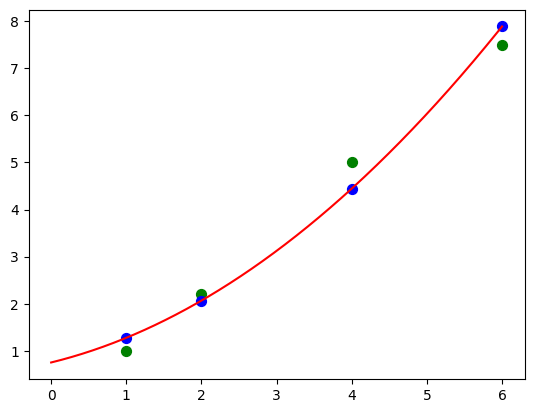

[1.2770000000000001, 2.067, 4.445, 7.8870000000000005]

In [331]:
agirlik1 = 0.391
agirlik2 = 0.133
bias = 0.753

# 0.39146656776604805 0.1332867793581989 0.7530513052953026
# float64 olarak kaydedersek model boyutumuz 24 byte olur
# float32 olarak kaydedersek model boyutumuz 12 byte olur
# parametre sayımız da 3 olur
ikinci_tahminler = []

for borc in df['borc']:
    risk_tahmini = risk_hesapla(borc)
    ikinci_tahminler.append(risk_tahmini)
grafigi_ciz(ikinci_tahminler)
ikinci_tahminler

In [136]:
class YapaySinirHucresi():
  def __init__(self):
    np.random.seed(42)
    self.agirlik1 = np.random.randn()
    self.agirlik2 = np.random.randn()
    self.bias = np.random.randn()

  def risk_hesapla(self, borc):
    return self.agirlik1 * borc + self.agirlik2 * borc ** 2 + self.bias
  
  def hata_hesapla(self, tahminler, gercekler):
    # MSE Hesaplama (Mean Squared Error)
    # Türev ve gradyan hesaplamaları ile backpropagation için bu hata hesaplaması kullanılacak
    hata = 0
    for tahmin, gercek in zip(tahminler, gercekler):
      hata += self.yonlu_hata_hesaplama(tahmin, gercek) ** 2
    return hata / len(tahminler)
  
  def yonlu_hata_hesaplama(self, tahmin, gercek):
    return tahmin - gercek

  def ogren(self, veriler, ogrenme_orani, epoch):
    for i in range(epoch):

      tahminler = []
      for borc in veriler['borc']:
        tahmin = self.risk_hesapla(borc)
        tahminler.append(tahmin)

      for borc, risk, tahmin in zip(veriler['borc'], veriler['risk'], tahminler):
        hata = self.yonlu_hata_hesaplama(tahmin, risk)

        
        if hata > 0.001 or hata < -0.001:
          self.agirlik1 += ogrenme_orani * np.random.randn()
          self.agirlik2 += ogrenme_orani * np.random.randn()
          self.bias += ogrenme_orani * np.random.randn()

      print("Epoch: ", i, " Hata: ", self.hata_hesapla(tahminler, veriler['risk']))
    
  def grafigi_ciz(self, veriler, tahminler):
    line = [self.risk_hesapla(i) for i in np.linspace(0, 6, 1000)]
    plt.plot(np.linspace(0, 6, 1000), line, c = 'red')
    plt.scatter(veriler['borc'], veriler['risk'], s = 50, c = 'green', label = "Doğru Değerler")
    plt.scatter(veriler['borc'], tahminler, s = 50, c = 'blue', label = "İlk Tahminler")
    plt.show()

  def kaydet(self, dosya_adi):
    with open(dosya_adi, 'w') as file:
      file.write(str(self.agirlik1) + '\n')
      file.write(str(self.agirlik2) + '\n')
      file.write(str(self.bias) + '\n')

  def yukle(self, dosya_adi):
    with open(dosya_adi, 'r') as file:
      self.agirlik1 = float(file.readline())
      self.agirlik2 = float(file.readline())
      self.bias = float(file.readline())
      
      print("Yükleme Başarılı")
      print("Ağırlıklar: ", self.agirlik1, self.agirlik2, self.bias)      
    

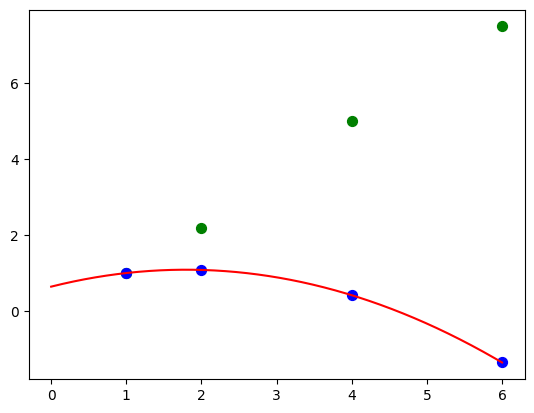

In [137]:
sinir_hucresi = YapaySinirHucresi()
tahminler = []
for borc in df['borc']:
  tahminler.append(sinir_hucresi.risk_hesapla(borc))

sinir_hucresi.grafigi_ciz(df, tahminler)


Epoch:  0  Hata:  19485.752600333188
Epoch:  1  Hata:  19617.44780062156
Epoch:  2  Hata:  19470.32916950845
Epoch:  3  Hata:  19320.64657244589
Epoch:  4  Hata:  19337.26954547037
Epoch:  5  Hata:  19339.07639364981
Epoch:  6  Hata:  19445.570630990027
Epoch:  7  Hata:  19450.433608323452
Epoch:  8  Hata:  19347.44678102167
Epoch:  9  Hata:  19298.653623051465
Epoch:  10  Hata:  19381.103187001605
Epoch:  11  Hata:  19345.97780748717
Epoch:  12  Hata:  19220.807954759184
Epoch:  13  Hata:  19156.38596870395
Epoch:  14  Hata:  19309.254603408117
Epoch:  15  Hata:  19271.700917409064
Epoch:  16  Hata:  19243.893854427104
Epoch:  17  Hata:  19295.220433210692
Epoch:  18  Hata:  19173.86404291034
Epoch:  19  Hata:  19136.087287173592
Epoch:  20  Hata:  19207.428478571208
Epoch:  21  Hata:  19096.308845308147
Epoch:  22  Hata:  19211.965658014084
Epoch:  23  Hata:  19347.334770085617
Epoch:  24  Hata:  19524.861874251586
Epoch:  25  Hata:  19498.34837894606
Epoch:  26  Hata:  19455.0193289

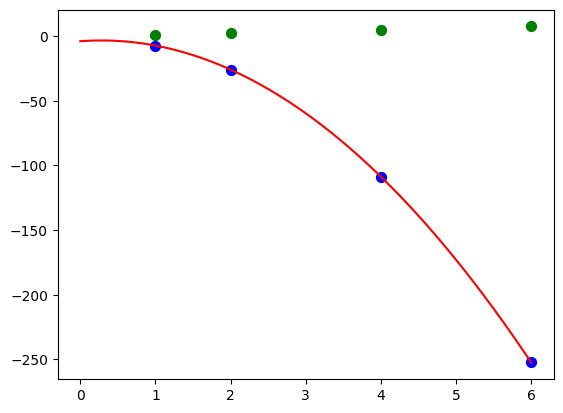

In [147]:
sinir_hucresi.ogren(df, 0.01, 5000)

tahminler = []
for borc in df['borc']:
  tahminler.append(sinir_hucresi.risk_hesapla(borc))

sinir_hucresi.grafigi_ciz(df, tahminler)


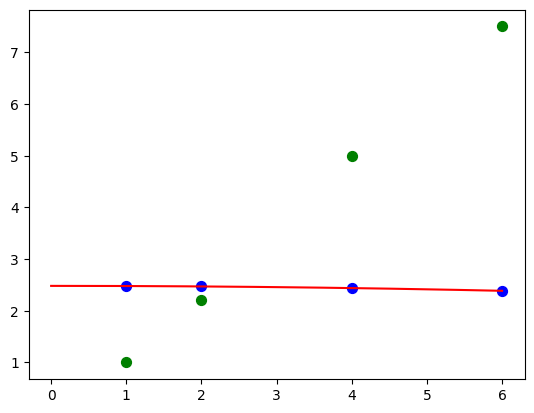

In [126]:


tahminler = []
for borc in df['borc']:
  tahminler.append(sinir_hucresi.risk_hesapla(borc))

sinir_hucresi.grafigi_ciz(df, tahminler)

In [399]:
sinir_hucresi.kaydet("model.txt")

Başlangıç Ağırlıkları:  0.4967141530112327 -0.13826430117118466 0.6476885381006925
İlk Tahminler:  [1.0061383899407406, 1.0880596394384192, 0.4223163314066687, -1.3495413859945589]
Başlangıç Hatası:  25.126504889353374


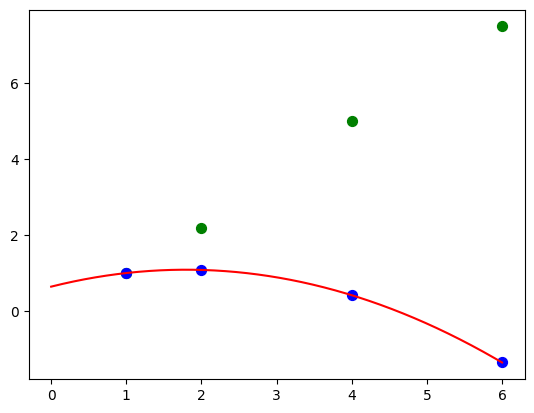

In [396]:
sinir_huresi_2 = YapaySinirHucresi(df)
sinir_huresi_2.grafigi_ciz()

Yükleme Başarılı
Ağırlıklar:  0.3914753753081233 0.13330837917407962 0.7530606270177795


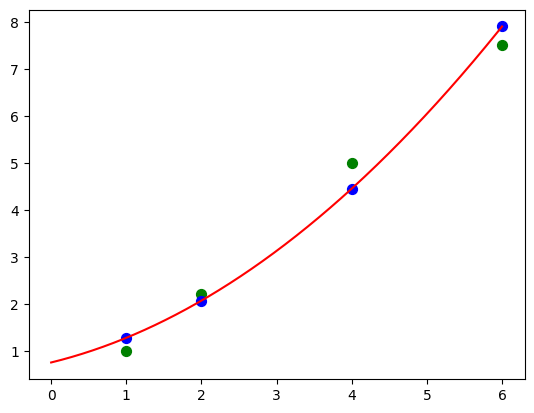

In [400]:
sinir_huresi_2.yukle("model.txt")
sinir_huresi_2.grafigi_ciz()